In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
column_names = ['date','time','ip','entrypoint','incoming','outgoing']
data_raw = pd.read_csv('../01.data/PeopleCountData.txt',names=column_names)

In [3]:
data_raw.head(4)

,date,time,ip,entrypoint,incoming,outgoing
0,5/4/2017,3:51 PM,172.30.45.113,GleasonStacks,16883,21997
1,5/4/2017,3:51 PM,172.30.45.114,GleasonEntrance,21815,26919
2,5/4/2017,3:51 PM,172.30.45.115,DouglassBridge,22395,16779
3,5/4/2017,3:51 PM,172.30.45.116,FriedlanderLobby,68587,61672


In [4]:
data = data_raw.copy()
data['timestamp'] = pd.to_datetime(data.date+' '+data.time)
data.head(2)

,date,time,ip,entrypoint,incoming,outgoing,timestamp
0,5/4/2017,3:51 PM,172.30.45.113,GleasonStacks,16883,21997,2017-05-04 15:51:00
1,5/4/2017,3:51 PM,172.30.45.114,GleasonEntrance,21815,26919,2017-05-04 15:51:00


In [5]:
columns_values = ['incoming', 'outgoing']

In [6]:
data_diffed_wide = data.pivot_table(values=columns_values, index='timestamp', columns='entrypoint').diff()
data_diffed_wide = data_diffed_wide.groupby(data_diffed_wide.index.date).sum()
data_diffed_wide.head(4)

incoming                                                 \
entrypoint DouglassBridge FriedlanderLobby GleasonEntrance GleasonStacks   
2017-05-04          527.0           1179.0           428.0         372.0   
2017-05-05         1213.0           2718.0          1032.0         901.0   
2017-05-06         1322.0           2506.0          1098.0         841.0   
2017-05-07         1366.0           2571.0          1092.0         885.0   

                 outgoing                                                 
entrypoint DouglassBridge FriedlanderLobby GleasonEntrance GleasonStacks  
2017-05-04          463.0           1140.0           595.0         557.0  
2017-05-05          986.0           2529.0          1220.0        1030.0  
2017-05-06         1055.0           2283.0          1333.0         956.0  
2017-05-07         1114.0           2343.0          1369.0        1010.0

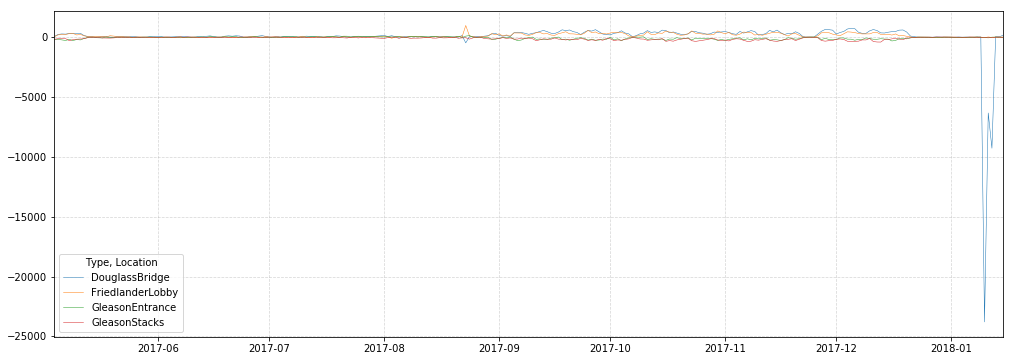

In [7]:
data_incoming = data_diffed_wide.loc[:,['incoming']].iloc[:-10,]
data_incoming.columns = data_incoming.columns.droplevel(0)

data_outgoing = data_diffed_wide.loc[:,['outgoing']].iloc[:-10,]
data_outgoing.columns = data_outgoing.columns.droplevel(0)

(data_incoming-data_outgoing).plot(lw=0.5, figsize=(17,6))
plt.grid(ls='--',lw=0.75,alpha=0.5)
plt.legend(title='Type, Location');

In [8]:
data_wide = data.pivot_table(values = columns_values,
                             index = ['timestamp'],
                             columns = 'entrypoint',
                             aggfunc = 'mean').diff()

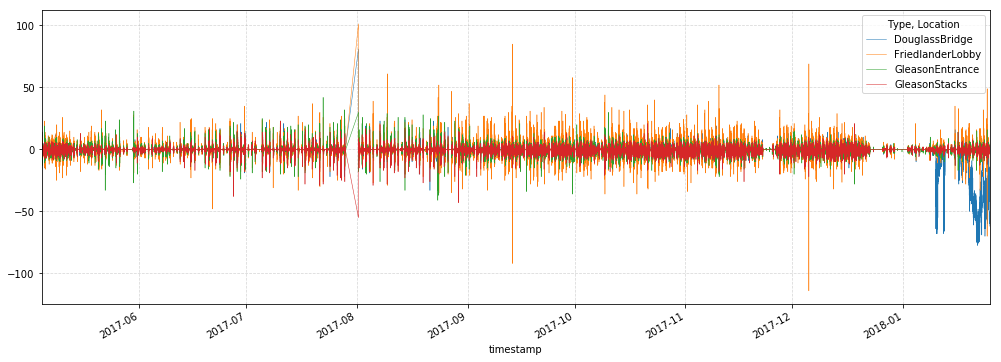

In [9]:
data_incoming = data_wide.loc[:,['incoming']].iloc[:-230,:]
data_incoming.columns = data_incoming.columns.droplevel(0)

data_outgoing = data_wide.loc[:,['outgoing']].iloc[:-230,:]
data_outgoing.columns = data_outgoing.columns.droplevel(0)

(data_incoming-data_outgoing).plot(lw=0.5, figsize=(17,6))
plt.grid(ls='--',lw=0.75,alpha=0.5)
plt.legend(title='Type, Location');

In [18]:
data_wide.columns = ['_'.join(t) for t in data_wide.columns]
data_wide = data_wide.dropna()
data_wide.head(2)

,incoming_DouglassBridge,incoming_FriedlanderLobby,incoming_GleasonEntrance,incoming_GleasonStacks,outgoing_DouglassBridge,outgoing_FriedlanderLobby,outgoing_GleasonEntrance,outgoing_GleasonStacks
timestamp,,,,,,,,
2017-05-04 15:53:00,5.0,6.0,3.0,2.0,4.0,4.0,5.0,6.0
2017-05-04 15:54:00,2.0,1.0,1.0,1.0,1.0,8.0,2.0,1.0


In [19]:
data_wide.to_csv(path_or_buf='../01.data/PeopleCountData_wide.txt', sep='|')